In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df1=pd.read_csv('USA_cars_datasets.csv')

In [3]:
df1.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [4]:
df1.drop(columns=['Unnamed: 0'],inplace=True,axis=1)

In [5]:
df1.columns

Index(['price', 'brand', 'model', 'year', 'title_status', 'mileage', 'color',
       'vin', 'lot', 'state', 'country', 'condition'],
      dtype='object')

In [6]:
df1.isnull().sum()

price           0
brand           0
model           0
year            0
title_status    0
mileage         0
color           0
vin             0
lot             0
state           0
country         0
condition       0
dtype: int64

In [7]:
df1.dtypes

price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

In [8]:
df1.shape

(2499, 12)

Exploring Each Feature(column)

In [9]:
df1.describe()

,price,year,mileage,lot
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03
mean,18767.671469,2016.714286,5.229869e+04,1.676914e+08
std,12116.094936,3.442656,5.970552e+04,2.038772e+05
min,0.000000,1973.000000,0.000000e+00,1.593488e+08
25%,10200.000000,2016.000000,2.146650e+04,1.676253e+08
50%,16900.000000,2018.000000,3.536500e+04,1.677451e+08
75%,25555.500000,2019.000000,6.347250e+04,1.677798e+08
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08


Price cannot be zero

In [10]:
df1.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


FIRST FIND AVERAGE PRICE BY EACH BRAND
And creating new column Average_price

In [11]:
df1['Average_price']=df1.groupby('brand')['price'].transform('median')

In [12]:
df1.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300.0
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,22000.0
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22000.0
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0


In [13]:
df2=df1[df1['price']==0] 

In [14]:
l1_delete=df1[df1['price']==0].index

In [15]:
df1.drop(l1_delete,inplace=True) 

In [16]:
df2['price']=df2['Average_price']


In [17]:
df3=pd.concat([df1,df2],ignore_index=True)


HERE WE HAVE CREATED df3 which has taken the median value of price by each brand where price was =0

In [18]:
df3.shape

(2499, 13)

In [19]:
df3.head() 

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price
0,6300.0,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,6300.0
1,2899.0,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,22000.0
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0
3,25000.0,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,22000.0
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0


In [20]:
df3.describe() 

,price,year,mileage,lot,Average_price
count,2499.000000,2499.000000,2.499000e+03,2.499000e+03,2499.000000
mean,19075.729692,2016.714286,5.229869e+04,1.676914e+08,18527.166867
std,11884.817078,3.442656,5.970552e+04,2.038772e+05,4507.899573
min,25.000000,1973.000000,0.000000e+00,1.593488e+08,287.500000
25%,10665.000000,2016.000000,2.146650e+04,1.676253e+08,16900.000000
50%,17100.000000,2018.000000,3.536500e+04,1.677451e+08,22000.000000
75%,25600.000000,2019.000000,6.347250e+04,1.677798e+08,22000.000000
max,84900.000000,2020.000000,1.017936e+06,1.678055e+08,54680.000000


BELOW WE SEE THAT WE HAVE VERY LESS DATA FOR MANY YEARS, THIS CAN LEAD TO BIAS BEHAVIOUR AND WE WOULD NOT BE ABLE TO MAKE AN INFERENCE PROPERLY

In [21]:
df3.groupby('year')['brand'].count()


year
1973      1
1984      1
1993      1
1994      2
1995      1
1996      2
1997      2
1998      4
1999      1
2000      4
2001      5
2002      2
2003      9
2004      6
2005      6
2006      8
2007      6
2008     18
2009     11
2010     13
2011     23
2012     72
2013     86
2014    104
2015    196
2016    203
2017    377
2018    395
2019    892
2020     48
Name: brand, dtype: int64

LOT OF DATA PRESENT IN BETWEEN 2015 AND 2020

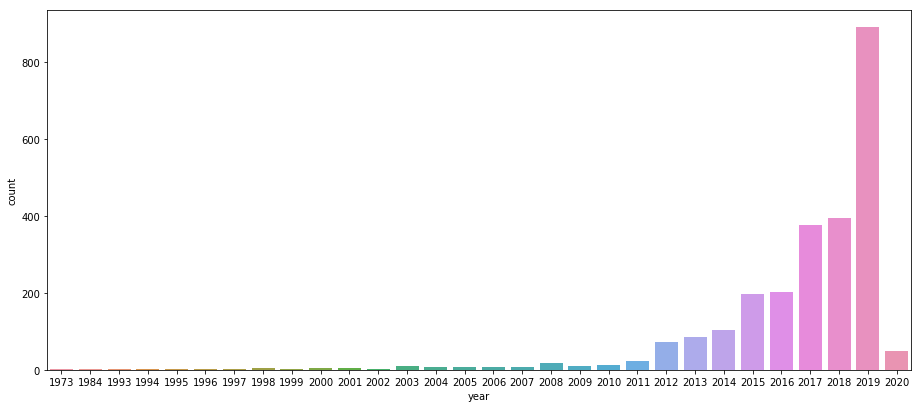

In [22]:
fig1=plt.figure(figsize=(12,5))
ax1=fig1.add_axes([0,0,1,1])
sns.countplot(x='year',data=df3,ax=ax1) 

 the mean data points that we have for each year(Highy influenced by outliers)

In [23]:
df3.groupby('year')['brand'].count().mean() 

83.3

In [24]:
df3.groupby('year')['brand'].count().median() 

7.0

From the given data we cannot analyze the data points which have very less data,
and it is not possible to generate so many data points for a particular year.

In [25]:
df3['Occurence']=df3.groupby('year')['brand'].transform('count')

In [26]:
df4=df3[np.logical_or.reduce([df3['year']==2015,df3['year']==2016,df3['year']==2017,df3['year']==2018,df3['year']==2019,df3['year']==2020])]

In [27]:
df4.groupby('year')['brand'].count()

year
2015    196
2016    203
2017    377
2018    395
2019    892
2020     48
Name: brand, dtype: int64

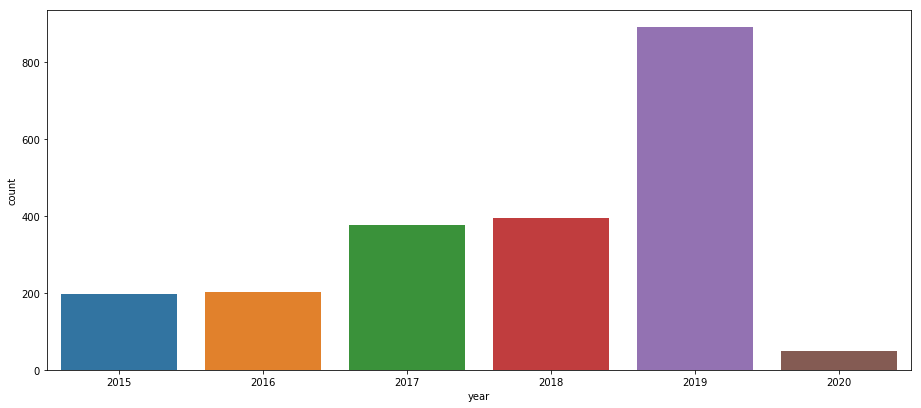

In [28]:
fig1=plt.figure(figsize=(12,5))
ax1=fig1.add_axes([0,0,1,1])
sns.countplot(x='year',data=df4,ax=ax1)

In [29]:
df4.groupby('year')['brand'].count()

year
2015    196
2016    203
2017    377
2018    395
2019    892
2020     48
Name: brand, dtype: int64

In [30]:
df4.shape

(2111, 14)

WORKING DATA

In [31]:
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price,Occurence
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0,395
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0,395
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,16900.0,395
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10585.0,377
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,17100.0,395


In [32]:
df5=df4.drop(columns=['Average_price','Occurence'],axis=1)

In [33]:
df5.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left


LETS COMPARE EACH CAR BRAND AVERAGE PRICE WITH ITS EACH MODEL PRICE
This will help us to know which model is priced over the average price of the brand
.....Lets visualize this
CONDITION: Taking into account for brands which have greater than atleast 3 models

In [34]:
e1=df4.groupby(['brand'])['model'].count().reset_index()

In [35]:
a1=list(e1[e1['model']>3]['brand'])

In [36]:
a1

['bmw',
 'buick',
 'cadillac',
 'chevrolet',
 'chrysler',
 'dodge',
 'ford',
 'gmc',
 'honda',
 'hyundai',
 'infiniti',
 'jeep',
 'kia',
 'land',
 'mercedes-benz',
 'nissan']

In [37]:
for i in a1:
    df4[df4['brand']==i].groupby('model')[['price','Average_price']].mean().iplot(kind='spread',xTitle='Average_price for BRAND',yTitle='Price of each model under the brand',size=5,title='FOR'+' '+i)

In [38]:
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price,Occurence
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0,395
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0,395
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,16900.0,395
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10585.0,377
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,17100.0,395


Distribution of colors sold in each year, THIS ALSO HAS NO_COLOR 

In [90]:
q2=df4.groupby(['year','color'])['brand'].count().reset_index()

In [91]:
l1=[2015,2016,2017,2018,2019,2020]

for i in l1:
    q2[q2['year']==i][['color','brand']].iplot(x='color',y='brand',color='red',kind='bar',title='Colors sold in year'+ ' '+str(i))

IN EACH STATE WHAT IS THE DISTRIUTION OF COLOR SOLD, WE ALSO HAVE NO_COLOR IN THIS

In [92]:
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price,Occurence
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0,395
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0,395
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,16900.0,395
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10585.0,377
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,17100.0,395


In [110]:
q3=df4.groupby(['state','color'])['brand'].count().reset_index()

In [117]:
q31=q3['state'].unique()

In [137]:
for i in q31:
    q3[q3['state']==i][['color','brand']].iplot(x='color',y='brand',color='red',kind='barh',title='Colors sold in'+' '+i)

In [131]:
df4.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,Average_price,Occurence
2,5350.0,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,16900.0,395
4,27700.0,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,17100.0,395
5,5700.0,dodge,mpv,2018,clean vehicle,45561.0,white,2c4rdgeg9jr237989,167655771,texas,usa,2 days left,16900.0,395
7,13350.0,gmc,door,2017,clean vehicle,23525.0,gray,1gks2gkc3hr326762,167692494,california,usa,20 hours left,10585.0,377
8,14600.0,chevrolet,malibu,2018,clean vehicle,9371.0,silver,1g1zd5st5jf191860,167763267,florida,usa,22 hours left,17100.0,395
